In [1]:
import pandas as pd
import numpy as np
from pct.tree.heuristic.Heuristic import Heuristic5
from pct.tree.heuristic.NumericHeuristicCopy1 import NumericHeuristic5
from pct.tree.splitter.splitterCopy1 import Splitter
from pct.tree.tree import Tree
#from pct.tree.treethreshold import Tree
# from pct.tree.ftest.ftest import FTest


## From YXH's data process

In [2]:

from sklearn.preprocessing import LabelEncoder

# Load the u.data dataset
u_data = pd.read_csv('C:/Users/13447/Desktop/Stats thesis/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

# # # Perform label encoding on user_id and item_id
# user_encoder = LabelEncoder()
# item_encoder = LabelEncoder()

# u_data['user_id'] = user_encoder.fit_transform(u_data['user_id'])
# u_data['item_id'] = item_encoder.fit_transform(u_data['item_id'])

# # # Create the rating matrix
# n_users = u_data['user_id'].nunique()
# n_items = u_data['item_id'].nunique()

# Define the threshold
THRESHOLD = 3  # Ratings above this are "Lovers", below are "Haters"

# Pivot the data
rating_matrix = u_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
rating_matrix.index = u_data['user_id'].unique()  # Ensure user_id alignment
rating_matrix.columns = u_data['item_id'].unique()  # Ensure item_id alignment


# Apply threshold classification to the rating matrix (after thresholding)
rating_matrix_thresholded = np.where(rating_matrix > THRESHOLD, 1, np.where(rating_matrix > 0, 0.5, 0))

# Convert numpy array to pandas DataFrame for easier inspection
rating_matrix_thresholded_df = pd.DataFrame(rating_matrix_thresholded)

rating_matrix_thresholded_df.index = u_data['user_id'].unique()  # Ensure user_id alignment
rating_matrix_thresholded_df.columns = u_data['item_id'].unique()  # Ensure item_id alignment


In [5]:
u_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
rating_matrix

,242,302,377,51,346,474,265,465,451,86,...,1594,1626,1645,1659,1682,1674,1640,1637,1630,1641
196,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
rating_matrix_thresholded_df

,242,302,377,51,346,474,265,465,451,86,...,1594,1626,1645,1659,1682,1674,1640,1637,1630,1641
196,1.0,0.5,1.0,0.5,0.5,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.5,0.0,0.0,1.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## initiate tree and splitter

In [9]:
tree = Tree(min_instances=7)
tree.fit(rating_matrix, u_data['rating'], target_weights=None)




✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  471
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 471: 429
❤️ Lovers: 228
💔 Haters: 201
❓ Unknowns: 514
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  231
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 231: 91
❤️ Lovers: 53
💔 Haters: 38
❓ Unknowns: 137
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  202
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 202: 17
❤️ Lovers: 13
💔 Haters: 4
❓ Unknowns: 36
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B4C17D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B4C17D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B4C17D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  260
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 260: 12
❤️ Lovers: 6
💔 Haters: 6
❓ Unknowns: 26
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C9FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C9FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C9FD90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  153
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 153: 86
❤️ Lovers: 68
💔 Haters: 18
❓ Unknowns: 51
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8E4FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8E4FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8E4FD90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  264
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 264: 131
❤️ Lovers: 65
💔 Haters: 66
❓ Unknowns: 70
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  402
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 402: 38
❤️ Lovers: 16
💔 Haters: 22
❓ Unknowns: 27
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B92A7D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B92A7D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B92A7D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  1016
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 1016: 29
❤️ Lovers: 12
💔 Haters: 17
❓ Unknowns: 37
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AE6450>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AE6450>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AE6450>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  408
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 408: 50
❤️ Lovers: 34
💔 Haters: 16
❓ Unknowns: 20
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7B27D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7B27D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7B27D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  412
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 412: 83
❤️ Lovers: 72
💔 Haters: 11
❓ Unknowns: 431
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  408
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 408: 45
❤️ Lovers: 26
💔 Haters: 19
❓ Unknowns: 27
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C53890>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C53890>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8C53890>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  154
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 154: 3
❤️ Lovers: 2
💔 Haters: 1
❓ Unknowns: 8
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8CDFD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8CDFD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B8CDFD90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  402
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 402: 215
❤️ Lovers: 83
💔 Haters: 132
❓ Unknowns: 216
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AFE110>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AFE110>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000183B7AFE110>. Stopping recursion.
✅ Tree built successfully!


In [10]:
tree.print_tree_structure()

Node: 471_1
Attribute: 471
Criterion: 93848.85858180528
Leaf Node: No
Children:
    Node: 231_2
    Attribute: 231
    Criterion: 28570.52752870808
    Leaf Node: No
    Children:
        Node: 202_3
        Attribute: 202
        Criterion: 6190.888078275447
        Leaf Node: No
        Children:
        Node: 260_7
        Attribute: 260
        Criterion: 3956.0548348452376
        Leaf Node: No
        Children:
        Node: 153_11
        Attribute: 153
        Criterion: 12617.50296825391
        Leaf Node: No
        Children:
    Node: 264_15
    Attribute: 264
    Criterion: 25095.706727140314
    Leaf Node: No
    Children:
        Node: 402_16
        Attribute: 402
        Criterion: 5914.745640642753
        Leaf Node: No
        Children:
        Node: 1016_20
        Attribute: 1016
        Criterion: 8787.503141841637
        Leaf Node: No
        Children:
        Node: 408_24
        Attribute: 408
        Criterion: 5172.082240141553
        Leaf Node: No
        C

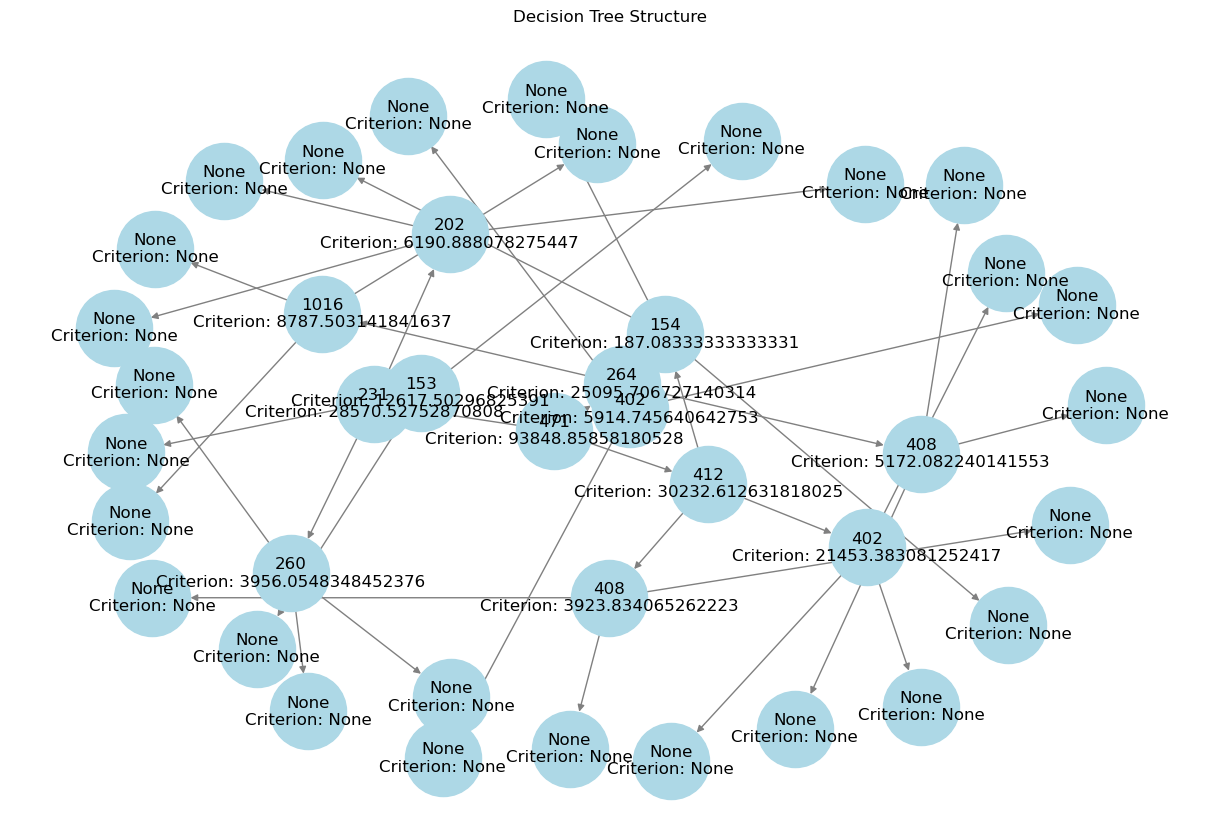

In [13]:
tree.visualize_tree()


In [9]:
tree = Tree(min_instances=7)
tree.fit(rating_matrix_thresholded_df, u_data['rating'], target_weights=None)

✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  65
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 65: 350
❤️ Lovers: 235
💔 Haters: 115
❓ Unknowns: 593
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  302
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 302: 75
❤️ Lovers: 35
💔 Haters: 40
❓ Unknowns: 160
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  566
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 566: 15
❤️ Lovers: 8
💔 Haters: 7
❓ Unknowns: 20
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C1137D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C1137D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C1137D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  1346
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 1346: 18
❤️ Lovers: 11
💔 Haters: 7
❓ Unknowns: 22
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6EC4790>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6EC4790>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6EC4790>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  815
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 815: 60
❤️ Lovers: 35
💔 Haters: 25
❓ Unknowns: 100
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C7142210>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C7142210>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C7142210>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  767
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 767: 69
❤️ Lovers: 43
💔 Haters: 26
❓ Unknowns: 46
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  611
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 611: 21
❤️ Lovers: 6
💔 Haters: 15
❓ Unknowns: 22
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6E17D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6E17D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6E17D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  794
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 794: 20
❤️ Lovers: 12
💔 Haters: 8
❓ Unknowns: 6
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C594DE50>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C594DE50>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C594DE50>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  496
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 496: 27
❤️ Lovers: 16
💔 Haters: 11
❓ Unknowns: 19
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C723FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C723FD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C723FD90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  959
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 959: 326
❤️ Lovers: 204
💔 Haters: 122
❓ Unknowns: 267
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  724
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 724: 121
❤️ Lovers: 72
💔 Haters: 49
❓ Unknowns: 83
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6DB7D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6DB7D90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6DB7D90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  407
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 407: 55
❤️ Lovers: 27
💔 Haters: 28
❓ Unknowns: 67
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C5CDFD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C5CDFD90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C5CDFD90>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  471
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 471: 117
❤️ Lovers: 67
💔 Haters: 50
❓ Unknowns: 150
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6AE8C10>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6AE8C10>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x00000227C6AE8C10>. Stopping recursion.
✅ Tree built successfully!


In [11]:
tree.print_tree_structure()

Node: 65_1
Attribute: 65
Criterion: 4912.331949268575
Leaf Node: No
Children:
    Node: 302_2
    Attribute: 302
    Criterion: 1968.477258523391
    Leaf Node: No
    Children:
        Node: 566_3
        Attribute: 566
        Criterion: 283.12202814063295
        Leaf Node: No
        Children:
        Node: 1346_7
        Attribute: 1346
        Criterion: 363.3476665727633
        Leaf Node: No
        Children:
        Node: 815_11
        Attribute: 815
        Criterion: 1025.5746100843826
        Leaf Node: No
        Children:
    Node: 767_15
    Attribute: 767
    Criterion: 906.9368766126418
    Leaf Node: No
    Children:
        Node: 611_16
        Attribute: 611
        Criterion: 317.48387956105637
        Leaf Node: No
        Children:
        Node: 794_20
        Attribute: 794
        Criterion: 173.14585137085137
        Leaf Node: No
        Children:
        Node: 496_24
        Attribute: 496
        Criterion: 190.87718045843042
        Leaf Node: No
        

## create rI and rU during preprocessing phase

In [ ]:

# Create rI and rU indexes for training set (R)
# rI: item to user ratings (dictionary of items with lists of user ratings)
rI = {}
for _, row in u_data.iterrows():
    item_id = row['item_id']
    user_id = row['user_id']
    rating = row['rating']
    if item_id not in rI:
        rI[item_id] = []
    rI[item_id].append((user_id, rating))

# rU: user to item ratings (dictionary of users with lists of item ratings)
rU = {}
for _, row in u_data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    if user_id not in rU:
        rU[user_id] = []
    rU[user_id].append((item_id, rating))

In [ ]:
# Optionally, print rI and rU to check the data structure for training and testing
print("\nSample rI (item to user ratings) for Training Set:")
for item in list(rI.keys())[:2]:  # Display sample item indices
    print(f"Item {item}: {rI[item]}")

print("\nSample rU (user to item ratings) for Training Set:")
for user in list(rU.keys())[:2]:  # Display sample user indices
    print(f"User {user}: {rU[user]}")

In [ ]:
# find and count users who have rated item 246 and their ratings
item_id = 55
print(f"Users who have rated item {item_id} and their ratings:")
print(rI[item_id])

# count users who have rated item 246 and their ratings
print(f"Number of users who have rated item {item_id}: {len(rI[item_id])}")

In [ ]:

print(f"Number of users who didn't rate item {item_id}:")
print(n_users - len(rI[item_id]))